# Thuật toán và Biểu diễn

In [1]:
from PriorityQueue import PriorityQueue
from Cell import Position, Cell

from typing import Iterable, Optional

def chebyshev_move(start: Position, end: Position) -> tuple[list[int], list[int]]:
    cur_x, cur_y = start
    xs = [cur_x]
    ys = [cur_y]

    while (cur_x != end.x) or (cur_y != end.y):
        dx = end.x - cur_x
        dy = end.y-cur_y
        if abs(dx) == abs(dy):
            # cur_x > end.x -> decrease x
            if dx < 0: cur_x -= 1
            else: cur_x += 1

            #cur_y > end.y -> decrease y
            if dy < 0: cur_y -= 1
            else: cur_y += 1
        elif abs(dx) < abs(dy):
            if dy < 0: cur_y -= 1
            elif dy > 0: cur_y += 1
        else:
            if dx < 0: cur_x -= 1
            elif dx > 0: cur_x += 1
        xs.append(cur_x)
        ys.append(cur_y)
    return xs, ys

def path_traceback(start_state: Cell, goal_state: Cell) -> list[Cell]:
    path = []
    while goal_state != start_state:
        path.append(goal_state)
        goal_state = goal_state.parent
    path.append(start_state)
    return list(reversed(path))

def astar_vacuum(dirty_cells: Iterable[Position],
                 start: Position, *,
                 do_traceback: bool = False)\
                -> tuple[Cell, Optional[list[Cell]]]:
    my_queue: PriorityQueue[Cell] = PriorityQueue()

    start_node = Cell(position=start, dirty_cells=dirty_cells)
    my_queue.push(start_node)
    while my_queue:
        cur = my_queue.pop()

        if len(cur.dirty_cells) == 0: break
        
        for neighbour in cur.expand_cell():
            if my_queue.get_attr(neighbour, 'cost', default_value=neighbour.cost + 1) > neighbour.cost:
                my_queue.push(neighbour)

    traceback = path_traceback(start_node, cur) if do_traceback else None
    return cur, traceback

In [2]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def show_animation(grid_dim:tuple[int, int], dirty_cells: set[Position],
                   xs: list[int], ys: list[int],
                   figure = plt.gcf()) -> None:
    figure.clear()
    ax = figure.add_subplot(xlim=(1, grid_dim[1] + 1), ylim=(1, grid_dim[0] + 1))
    ax_pos = ax.get_position()
    ax.set_aspect('equal')

    ax.vlines([i for i in range(1, grid_dim[1] + 1)],
              ymin=1, ymax=grid_dim[0] + 1, colors=(0, 0, 0, 0.2))
    ax.hlines([i for i in range(1, grid_dim[0] + 1)],
              xmin=1, xmax=grid_dim[1] + 1, colors=(0, 0, 0, 0.2))

    for tick in ax.xaxis.get_major_ticks():
        tick.tick1line.set_visible(False)
        tick.tick2line.set_visible(False)
        tick.label1.set_visible(False)
        tick.label2.set_visible(False)
    for tick in ax.yaxis.get_major_ticks():
        tick.tick1line.set_visible(False)
        tick.tick2line.set_visible(False)
        tick.label1.set_visible(False)
        tick.label2.set_visible(False)


    # path trace
    ax.plot([x + 0.5 for x in xs], [y + 0.5 for y in ys], '--', color=(0, 0, 1, 0.2))
    robot, = ax.plot([], [], 's', color=(34 / 255, 139 / 255, 34 / 255))
    dirty, = ax.plot([cell.x + 0.5 for cell in dirty_cells],
                     [cell.y + 0.5 for cell in dirty_cells], 'X', color=(1, 0, 0, 0.5))


    clean_costs = [1]
    cur_costs = [0]
    first = True
    for x, y in zip(xs[1:], ys[1:]):
        if (x, y) in dirty_cells and not first:
            first = True
            cur_costs.append(cur_costs[-1] + clean_costs[-1])
            clean_costs.append(clean_costs[-1])
        else:
            if (x, y) in dirty_cells: first = False
            clean_costs.append(clean_costs[-1] + 1)
            cur_costs.append(cur_costs[-1] + 1)
    
    cost_format = lambda clean, cur: f'Clean cost: {clean}\nCurrent cost: {cur}'
    cost_txt = figure.text(ax_pos.xmin - 0.1, ax_pos.ymax - 0.06,
                           cost_format(clean_costs[0], cur_costs[0]))
    first = True
    def animate(i):
        nonlocal dirty_cells, first
        
        if (xs[i], ys[i]) in dirty_cells and not first:
            dirty_cells = dirty_cells - {(xs[i], ys[i])}
            dirty.set_data([cell.x + 0.5 for cell in dirty_cells],
                           [cell.y + 0.5 for cell in dirty_cells])
            first = True
        elif (xs[i], ys[i]) in dirty_cells: first = False

        cost_txt.set_text(cost_format(clean_costs[i], cur_costs[i]))
        robot.set_data([xs[i] + 0.5], [ys[i] + 0.5])
        return robot, dirty


    ani = FuncAnimation(figure, animate, len(ys), interval=500, blit=True)
    return HTML(ani.to_jshtml())

<Figure size 640x480 with 0 Axes>

# <center>Chương trình<center>

In [3]:
import random as rand

In [2]:
dirty = {Position(1, 1),
         Position(1, 6),
         Position(3, 8),
         Position(5, 8),
         Position(8, 6)}
start = Position(4, 5)
grid_dim = (10, 8)
dirty_no = 10

In [ ]:
grid_dim = None
start = None
dirty_no = 0
dirty = set()
while not grid_dim or not start or not dirty_no:
    while not grid_dim:
        user_in = input("What is the grid dimension? (row, col): ")
        user_in = user_in.split(',')
        try:
            rows = int(user_in[0][1:])
            cols = int(user_in[1][:-1])
            grid_dim = (rows, cols)
        except ValueError:
            print("Incorrect format! Please specify number of rows and columns in grid as '(rows, cols)'")
    while not start:
        user_in = input("Where is the start position? Enter as (x, y) or any input to random a position: ")
        user_in = user_in.split(',')
        try:
            x = int(user_in[0][1:])
            y = int(user_in[1][:-1])
            if x < 1 or y < 1:
                print("Invalid input! Please specify start position in grid as '(x, y)' where x, y >= 1.\
                      Or any other input to random a position.")
                continue
            start = Position(x, y)
        except ValueError:
            start = Position(rand.randint(1, grid_dim[1]), rand.randint(1, grid_dim[0]))
    while not dirty_no:
        user_in = input("How many dirty cells are there? ")
        try:
            dirty_no = int(user_in)
            if dirty_no < 1: raise ValueError()
        except ValueError:
            print("Invalid input! Number of dirty cells must be integer >= 1")
            dirty_no = 0

positions = [Position(i, j) for i in range(1, grid_dim[1] + 1) for j in range(1, grid_dim[0] + 1)]
dirty = {pos for pos in rand.sample(positions, dirty_no)}

print(f"""Grid Dimension: {grid_dim[0]}x{grid_dim[1]}
Initial position: {start}
Positions of dirty cells:
{sorted(dirty)}""")

Grid Dimension: 10x10
Initial position: (6, 6)
Positions of dirty cells:
{(8, 8), (2, 1), (8, 1), (7, 10), (5, 4), (6, 8), (2, 2), (8, 2), (1, 3)}


In [13]:
goal = astar_vacuum(dirty, start, do_traceback=True)
print(f"Total cost: {goal[0].cost}")

Total cost: 135


In [14]:
for i, cell in enumerate(goal[1]):
    action = 'Start at' if i == 0 else 'Suck'
    print(f"{action} cell {cell.position} with cost {cell.cost}")

Start at cell (6, 6) with cost 0
Suck cell (8, 8) with cost 5
Suck cell (7, 10) with cost 12
Suck cell (6, 8) with cost 21
Suck cell (5, 5) with cost 34
Suck cell (2, 2) with cost 50
Suck cell (1, 3) with cost 65
Suck cell (2, 1) with cost 83
Suck cell (8, 1) with cost 111
Suck cell (8, 2) with cost 135


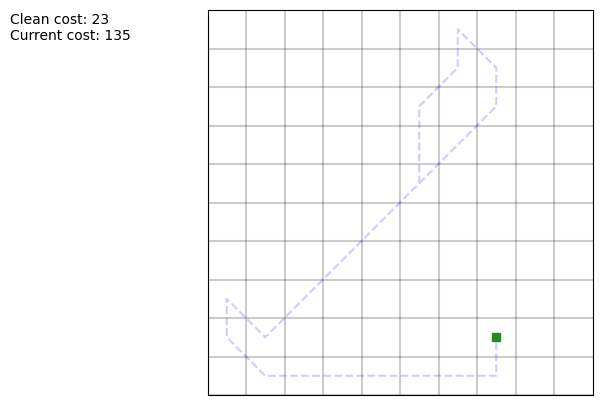

In [15]:
xs = []
ys = []
for i, cell in enumerate(goal[1][:-1]):
    temp_x, temp_y = chebyshev_move(cell.position, goal[1][i + 1].position)
    xs.extend(temp_x)
    ys.extend(temp_y)
xs.append(goal[0].position.x)
ys.append(goal[0].position.y)
fig = plt.figure(figsize=(8, 5))
show_animation(grid_dim, dirty, xs, ys, fig)